In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 한글
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings

warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 91 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 실습 1

In [ ]:
# 입력 변수 (집 크기)와 출력 변수 (집 가격)
# 실제 데이터 - 시각화 파란색 점
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

## 1. 선형 회귀 수식 구하기
- 가중치 w, 상수(y절편) b로 객체 생성하고 넘파이의 polyfit()함수 이용

In [ ]:
# polyfit 문서
# https://numpy.org/doc/2.0/reference/generated/numpy.polyfit.html

fp1 = np.polyfit(house_size, house_price, 1) # polyfit(x, y, 차수)
w = fp1[0]
b = fp1[1]

## 2. 예측값 계산
- predicted_price변수에 회귀 함수식 지정

In [ ]:
predicted_price = w * house_size + b

## 3. MSE 계산
- MSE 수식을 쓰고, mse라는 객체로 지정하세요

In [ ]:
mse = np.mean((house_price - predicted_price) ** 2)

## 4. 결과 출력

In [ ]:
print(f"기울기 w: {w:.4f}")
print(f"절편 b: {b:.4f}")
print(f"평균 제곱 오차 (MSE): {mse:.4f}")

기울기 w: 0.3570
절편 b: 0.1068
평균 제곱 오차 (MSE): 0.1022


## 5. 시각화

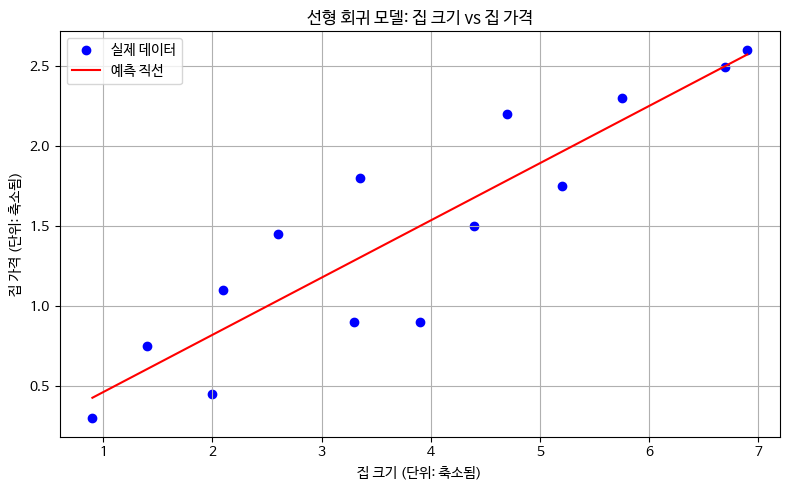

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(house_size, house_price, color='blue', label='실제 데이터')
plt.plot(house_size, predicted_price, color='red', label='예측 직선')
plt.title("선형 회귀 모델: 집 크기 vs 집 가격")
plt.xlabel("집 크기 (단위: 축소됨)")
plt.ylabel("집 가격 (단위: 축소됨)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# 실습 2

## 초기 파라미터

In [ ]:
w, b = 0.0, 0.0
lr = 0.01       # 학습률 (learning rate)
epochs = 1000   # 반복 횟수=> ML/DL에서 최적화할 때 변경하는 수치
n = len(house_size)

## 비용 추적용 리스트

In [ ]:
cost_list = []

## 경사 하강법

In [ ]:
for epoch in range(epochs):
    ######## y_pred 변수에 회귀 함수식 지정########
    y_pred = w * house_size + b

    ######## error 변수에 에러(loss) 계산 지정 ######## loss = mse +
    error = y_pred - house_price

    ######## w에 대해 미분한 식을 dw 객체 지정 ########
    dw = (2/n) * np.sum(error * house_size) # -> 2/n 미분 계수

    ######## b에 대해 미분한 값을 db 객체 지정 ########
    db = (2/n) * error.sum()

    ######## w 계산해 w 객체에 업데이트 ######## -> 기울기
    w -= lr * dw

    ######## b 계산해 b 객체에 업데이트 ######## -> 절편
    b -= lr * db

    ######## mse 계산해 mse 객체 지정 ########
    mse = np.mean(error ** 2)

    ######## mse값 cost_list에 지정 ########
    cost_list.append(mse)

## 최종 결과 출력

In [ ]:
print(f"학습 완료! 기울기 w = {w:.4f}, 절편 b = {b:.4f}")
print(f"최종 MSE: {mse:.4f}")

학습 완료! 기울기 w = 0.3570, 절편 b = 0.1068
최종 MSE: 0.1022


## 회귀선 예측

In [ ]:
predicted_price = w * house_size + b

## 실제 데이터와 예측 직선 시각화

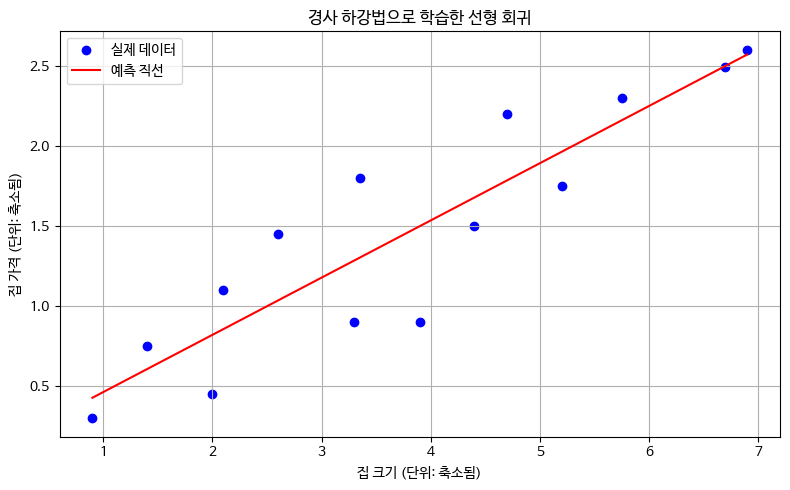

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(house_size, house_price, color='blue', label='실제 데이터')
plt.plot(house_size, predicted_price, color='red', label='예측 직선')
plt.title("경사 하강법으로 학습한 선형 회귀")
plt.xlabel("집 크기 (단위: 축소됨)")
plt.ylabel("집 가격 (단위: 축소됨)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 실습 3 문제 코드 - 다중 선형 회귀

## 1. 입력 변수

In [ ]:
house_size = np.array([1.0, 1.5, 1.8, 5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0])  # 집 크기
distance_from_station = np.array([5, 4.6, 4.2, 3.9, 3.9, 3.6, 3.5, 3.4, 2.9, 2.8, 2.7, 2.3, 2.0, 1.8, 1.5, 1.0])  # 지하철역으로부터의 거리 (km)
number_of_rooms = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])  # 방 수

## 2. 설계 행렬 X 정의

In [ ]:
X = np.array([
    np.ones(16),                   # np.ones(16): 모든 행마다 1을 추가하기 위해 (총 16개의 1 필요)
    house_size,
    distance_from_station,
    number_of_rooms
]).T

## 3. 파라미터 (임의로 설정)

In [ ]:
theta = np.array([1, 2, 3, 4])  # θ₀=1, θ₁=2, θ₂=3, θ₃=4

## 4. 다중 선형 회귀 가설 함수

In [ ]:
def prediction(X, theta):
    return np.dot(X, theta) # X @ theta

## 5. 예측값 계산

In [ ]:
y_pred = prediction(X, theta)

## 6. 시각화 (집 크기 vs 예측값)

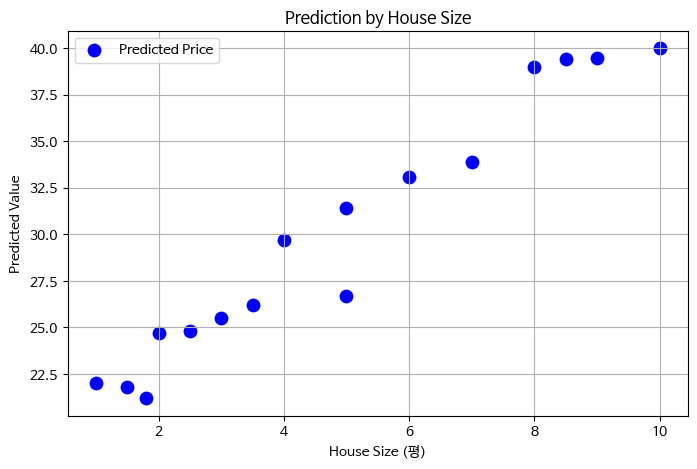

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(house_size, y_pred, color='blue', label='Predicted Price', s=80)
plt.xlabel("House Size (평)")
plt.ylabel("Predicted Value")
plt.title("Prediction by House Size")
plt.grid(True)
plt.legend()

# 실습3 - sklearn 이용

In [ ]:
from sklearn.linear_model import LinearRegression

## 1. 입력 변수

In [ ]:
house_size = np.array([1.0, 1.5, 1.8, 5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0])  # 집 크기
distance_from_station = np.array([5, 4.6, 4.2, 3.9, 3.9, 3.6, 3.5, 3.4, 2.9, 2.8, 2.7, 2.3, 2.0, 1.8, 1.5, 1.0])  # 지하철역으로부터의 거리 (km)
number_of_rooms = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])  # 방 수

# 종속변수 (y) 지정 - 임의로 저장
price = np.array([300, 330, 360, 650, 400, 420, 460, 500, 580, 600, 680, 750, 820, 850, 870, 920])

## 2. 특성 행렬 (X) 구성

In [ ]:
X = np.column_stack([house_size, distance_from_station, number_of_rooms])

## 3. 모델 학습

In [ ]:
model = LinearRegression()
model.fit(X, price)

LinearRegression()

## 4. 예측값 확인

In [ ]:
y_pred = model.predict(X)

## 5. 결과 출력

In [ ]:
print('계수: ', model.coef_) # theta (세타)
print('절편: ', model.intercept_)

계수:  [72.7908575  11.00899684  4.6295037 ]
절편:  193.82183710792594
